## Color Canada 2015 à colorier

The script below create a series of square-grid maps with the Canadian electoral districts. You can print and colour them while you watch the results unfold!
Les commandes ci-dessous génèrent des cartes des comtés fédéraux canadiens. Elles peuvent être imprimées et coloriées pendant la soirée électorale!

In [4]:
from chorogrid import Colorbin, Chorogrid
import pandas as pd
df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
df_prov = pd.read_csv('chorogrid/databases/canada_provinces.csv')
provinces = df.province.unique()

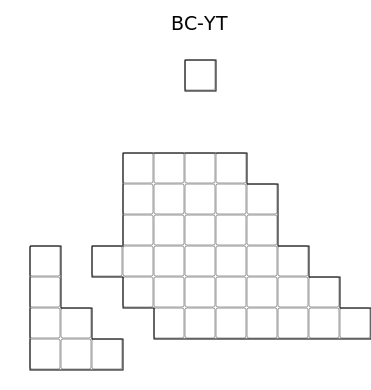

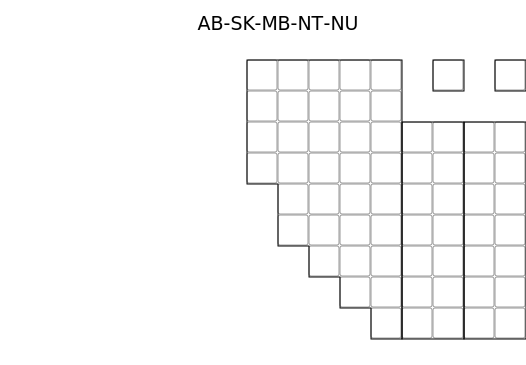

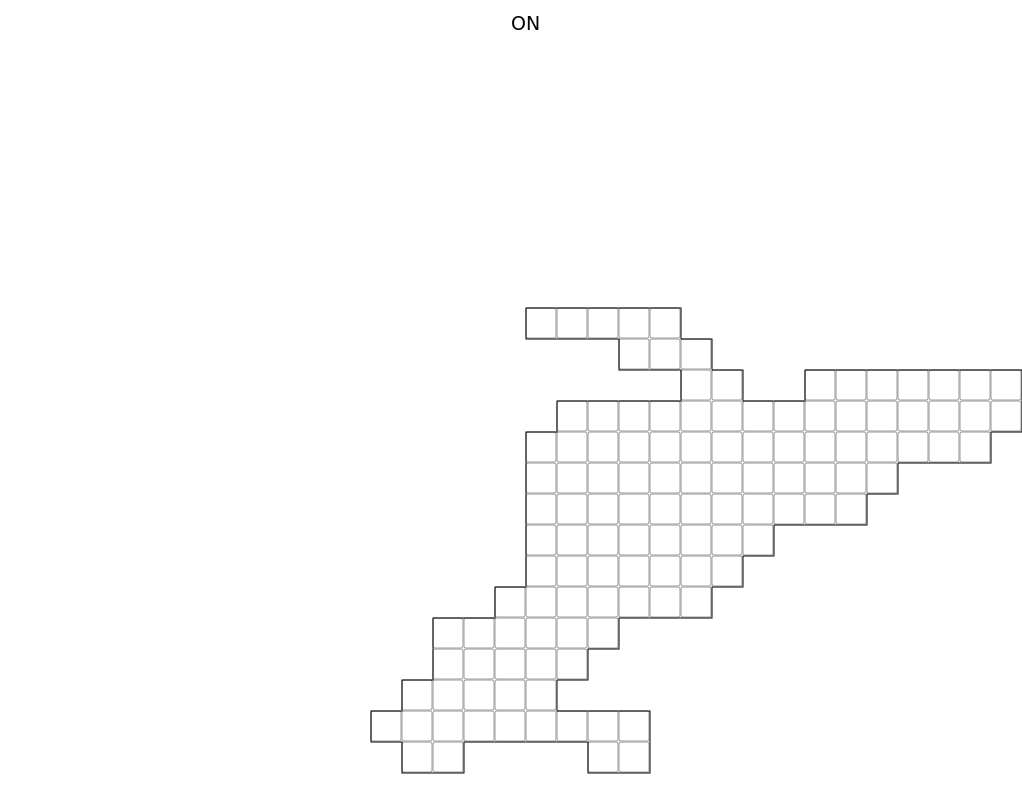

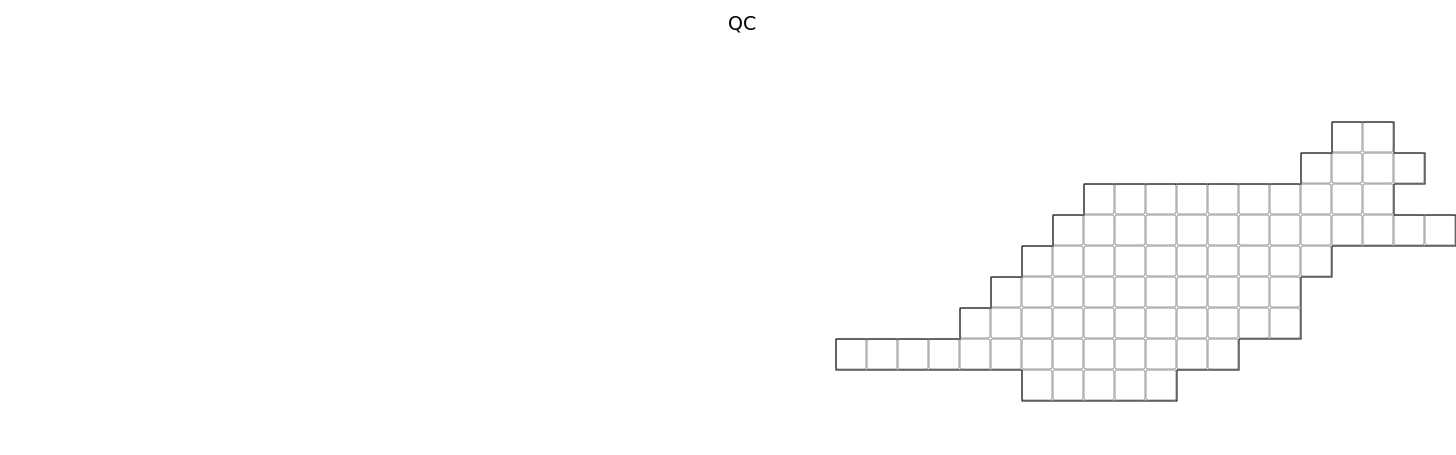

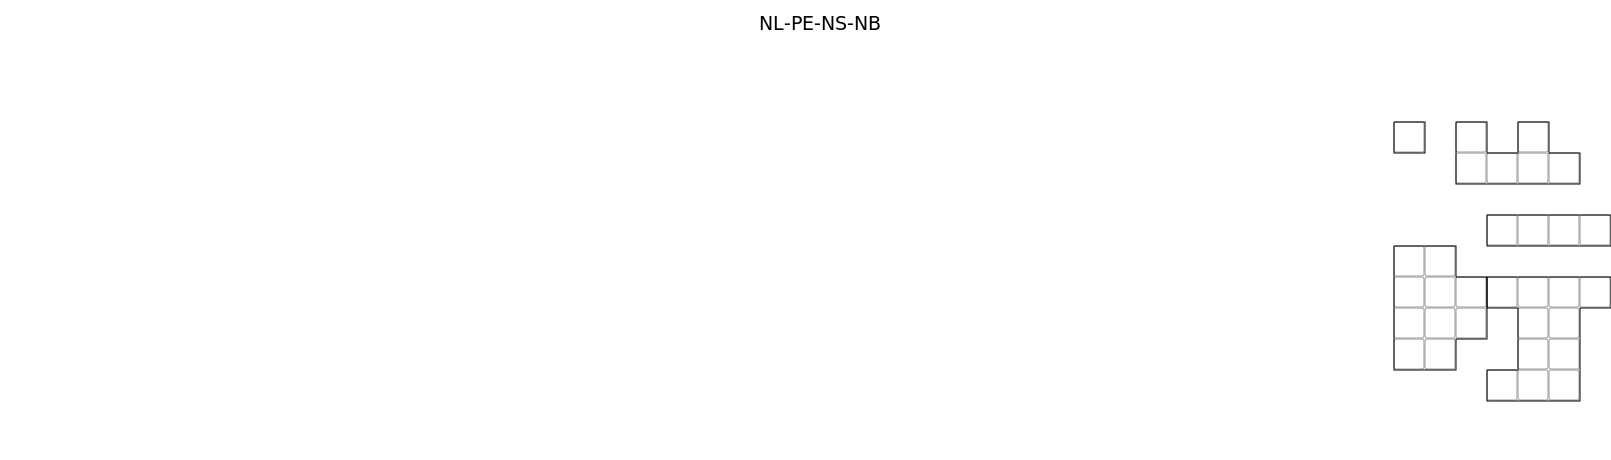

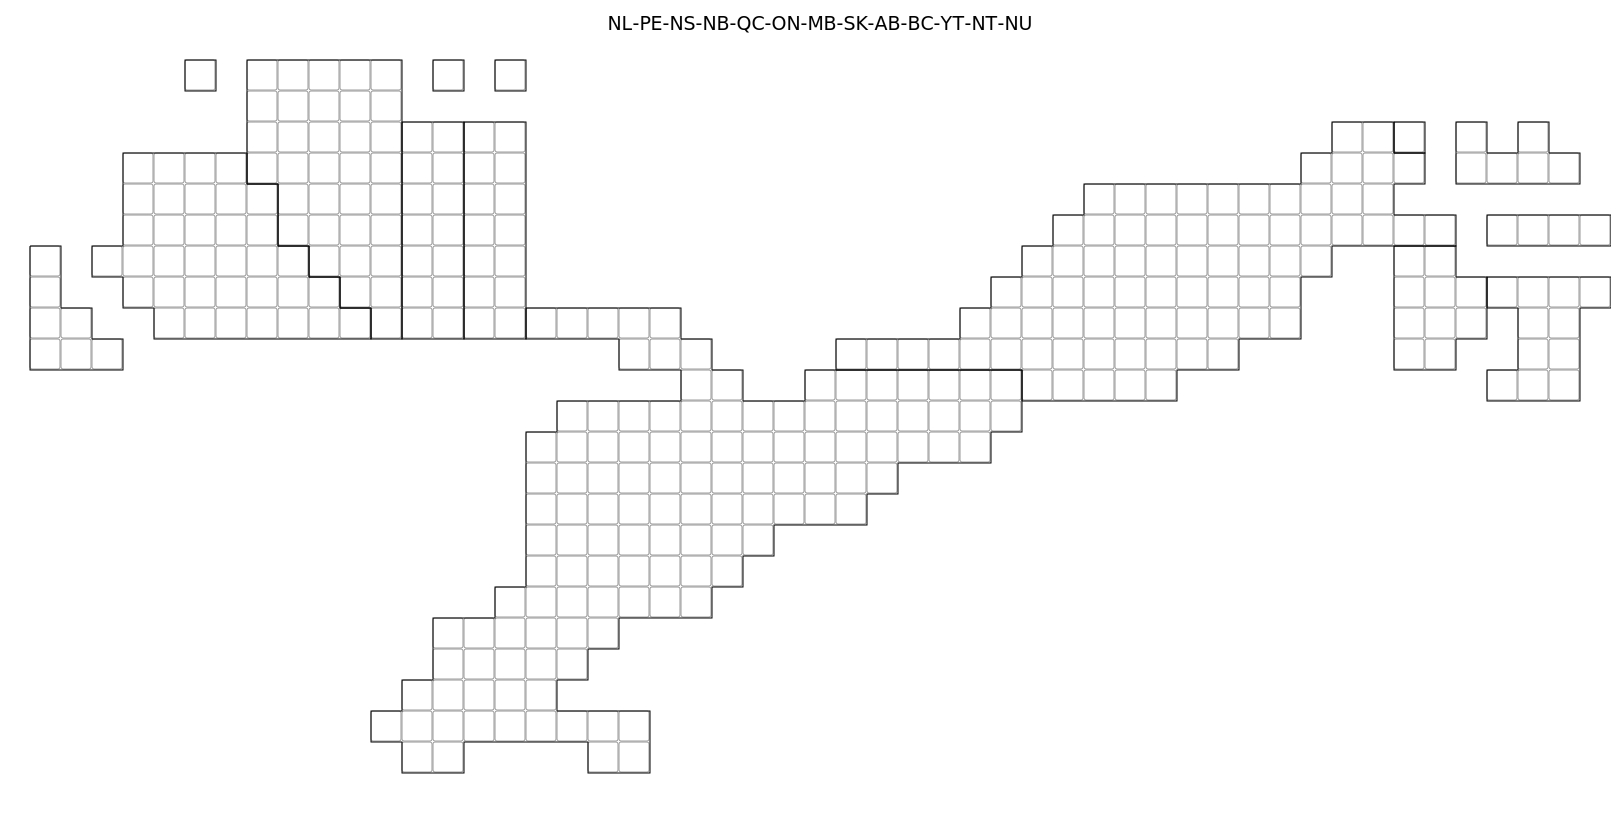

In [5]:
cell_size = 30
province_groups=[["BC", "YT"],["AB", "SK", "MB", "NT", "NU"], ["ON"], ["QC"], ['NL', 'PE', 'NS', 'NB'],
                 ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']]

for province_list in province_groups:
    province_display_name = "-".join(province_list)
    df_current_ridings = df[df.province.isin(province_list)]
    cg_ridings = Chorogrid(df_current_ridings,
                           list(df_current_ridings.federal_electoral_district), 
                           ['none' for province in list(df_current_ridings.province)],
                           'federal_electoral_district')
    cg_ridings.set_title("-".join(province_list), font_dict={'font-size': 19})
    cg_ridings.draw_squares(spacing_dict={'margin_right': 1,
                                          'name_y_offset':3,
                                          'cell_width': cell_size,
                                          'roundedness': 2,
                                          'stroke_width':1,
                                          'stroke_color':'#999'},
                            font_dict={'font-size':6,
                                       'text-anchor': 'left'})

    df_current_provinces = df_prov[df_prov.province.isin(province_list)]
    cg_prov = Chorogrid(df_current_provinces,
                        list(df_current_provinces.province), 
                        ['none' for x in list(df_current_ridings.province)],
                        'province')
    cg_prov.draw_multisquare(font_dict={'fill-opacity': 0}, 
                             spacing_dict={'margin_bottom': 250, 
                                           'cell_width': cell_size + 1,
                                           'stroke_width': 1, 
                                           'stroke_color': '#000000'})

    cg_ridings.done_and_overlay(cg_prov, save_filename=province_display_name+'.svg', show=True)
